In [1]:
import sys

sys.path.append("../../")

from astronn.datasets import deltascuti, bedding, corot, starmodels
from astronn.utils import inferences
from astronn.utils.metrics import *
from astronn import models

import tensorflow as tf
tf.autograph.set_verbosity(0)
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load stars datasets

In [2]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
df_ds = deltascuti()
df_delta_scuti = df_ds.load(
    "../../astronn/data/deltascuti/preprocessed/*", batch_size=1
)

# Read csv with other phisical paramters (L, Teff, ..)
csv_delta_scuti = pd.read_csv("../data/deltascuti/binaries_obs.csv")
print(csv_delta_scuti)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              ID  Dnu_muHz          L  Teff  L.Ltot  parallax       mv
0     KIC3858884        29  21.520774  6606   0.470    1.7800   9.3360
1     KIC4544587        74   6.475306  7750   0.332    1.3600  10.8470
2    KIC10661783        39  29.304625  7764   0.937    1.9400   9.5630
3       HD172189        19  29.942319  7750   0.702    2.2700   8.8850
4   CID100866999        56   3.

In [3]:
# Read dataset with astroseismology info (dft, ac, hod, ...)
bedding_stars = bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

# Read csv with other phisical paramters (L, Teff, ..)
csv_bedding = pd.io.parsers.read_csv("../data/bedding/bedding_teff_logg_rad.csv", sep=",")
csv_bedding

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


HD             Name         TIC      V    Teff      L  e.L.   rho  \
0     2280.0              NaN   281499618   9.13  7510.0   5.52  0.26  0.49   
1     3622.0              NaN    43363194   7.77  7930.0   7.86  0.35  0.45   
2    10779.0              NaN   229139161   8.78  7730.0   8.13  0.36  0.39   
3    10961.0              NaN   231014033   9.39  7430.0    NaN   NaN   NaN   
4    17341.0              NaN   122615966   9.32  7810.0  10.05  0.50  0.32   
5    17693.0              NaN   122686610   7.80  7880.0  10.21  0.44  0.33   
6    20203.0              NaN   274038922   8.85  7970.0   8.06  0.38  0.45   
7    20232.0              NaN   159895674   6.88  8060.0   8.64  0.36  0.44   
8    24572.0              NaN   242944780   9.45  7410.0   7.25  0.36  0.35   
9    24975.0              NaN    44645679   7.24  7790.0   9.20  0.39  0.35   
10   25248.0              NaN   459942890   8.60     NaN    NaN   NaN   NaN   
11   25369.0              NaN     9147509   9.68     NaN    NaN   NaN   NaN   
12   25674.0              NaN    34197596   8.69  8260.0  10.20  0.50  0.42   
13   28548.0              NaN    71134596   9.22  8510.0  10.82  0.55  0.45   
14   29783.0              NaN   269792989   7.87     NaN    NaN   NaN   NaN   
15   30422.0           EX Eri      589826   6.18  7940.0   8.42  0.35  0.42   
16   31322.0              NaN   246902545   9.28  8260.0  13.19  0.67  0.32   
17   31640.0              NaN   259675399   8.06  7690.0   8.25  0.35  0.37   
18   31901.0              NaN   316920092   9.07  7770.0   7.74  0.39  0.41   
19   32433.0              NaN   348792358   9.22  7700.0   7.32  0.35  0.42   
20   34282.0        V1366 Ori    24344701   9.92     NaN    NaN   NaN   NaN   
21   37286.0           HR1915    31475829   6.26  8080.0   8.18  0.34  0.47   
22   38597.0              NaN   100531058   8.65  8430.0  10.38  0.47  0.44   
23   38629.0              NaN    32763133   8.92  8170.0  11.27  0.53  0.35   
24   39060.0          betaPic   270577175   3.85  8080.0   8.49  0.39  0.45   
25   40317.0              NaN   282265535   8.45  8700.0  10.58  0.55  0.51   
26   42005.0              NaN   408906554   9.54  8030.0   8.75  0.42  0.42   
27   42608.0              NaN    37498433   9.85  8170.0  10.05  0.49  0.40   
28   42915.0              NaN   124429243   9.04  8520.0  12.82  0.68  0.38   
29   44726.0              NaN   150272131  10.38  7890.0   7.87  0.38  0.44   
30   44930.0              NaN    34737955   9.42  7320.0   7.17  0.40  0.33   
31   44958.0          V435Car   255548143   6.74  7660.0   7.82  0.32  0.38   
32   45424.0              NaN   117766204   7.18  8060.0  10.39  0.44  0.36   
33   46722.0              NaN   172193026   9.29  7810.0   8.28  0.40  0.40   
34   48985.0              NaN   148228220   9.04  7710.0  11.60  0.54  0.25   
35   50153.0              NaN    78492107   7.03  7820.0   9.15  0.39  0.36   
36   54711.0              NaN   284348793   9.01  8200.0   9.22  0.45  0.44   
37   55863.0              NaN   294157254   9.06  7650.0   7.80  0.38  0.38   
38   59104.0              NaN   278179191   8.50  7360.0   6.15  0.26  0.41   
39   59594.0          V349Pup   112484997   7.32  7800.0   8.06  0.34  0.40   
40   67688.0              NaN   306773428   7.66     NaN    NaN   NaN   NaN   
41   70510.0              NaN   388351327   6.75     NaN    NaN   NaN   NaN   
42   75040.0              NaN   176400189   9.05     NaN    NaN   NaN   NaN   
43   78198.0              NaN   332516661   9.50  7340.0   7.79  0.42  0.31   
44   89263.0           HR4043   463556278   6.22     NaN    NaN   NaN   NaN   
45   99506.0              NaN   287347434   8.36  7970.0   7.58  0.37  0.48   
46  220811.0              NaN   327996759   6.91     NaN    NaN   NaN   NaN   
47  222496.0              NaN   316806320   9.48     NaN    NaN   NaN   NaN   
48  223011.0              NaN   224284988   6.32  7830.0  10.49  0.44  0.31   
49  290750.0              NaN    11199304   9.77  9170.0  19

### Load pretrainned NN model

In [4]:
sepconv_mod = tf.keras.models.load_model(
    "/home/roberto/Projects/best_train/sepconvnn_tmp_dos_200/"
)
sepconv_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 351, 10)           1010      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 342, 10)           1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 68, 10)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 10)            40        
_________________________________________________________________
flatten (Flatten)            (None, 680)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               68100     
Total params: 70,160
Trainable params: 70,140
Non-trainable params: 20
___________________________________________________

## Results for 11 Binary DS Stars

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


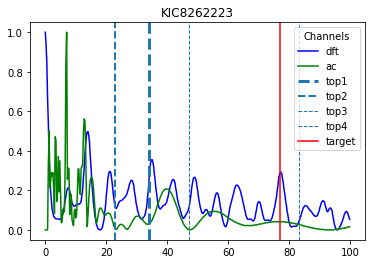

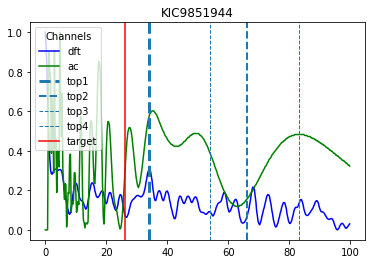

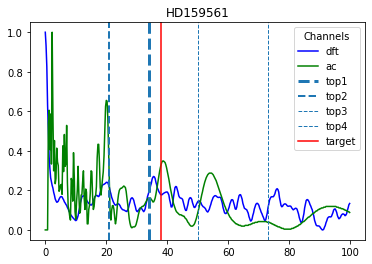

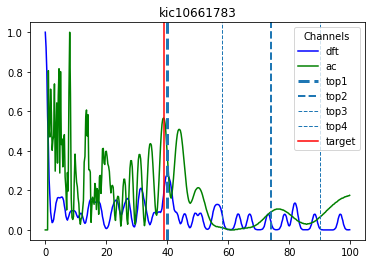

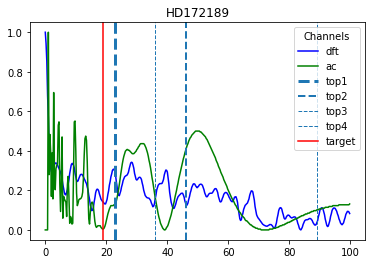

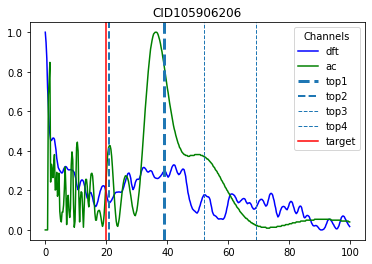

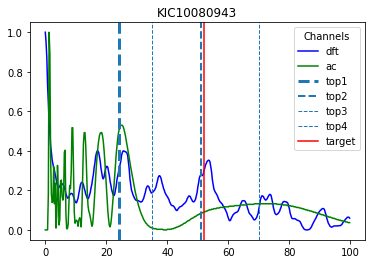

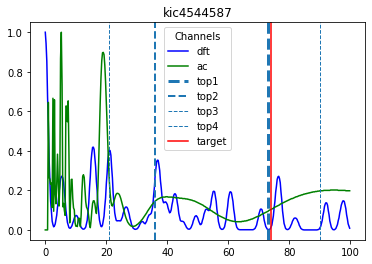

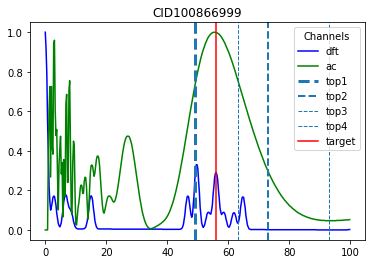

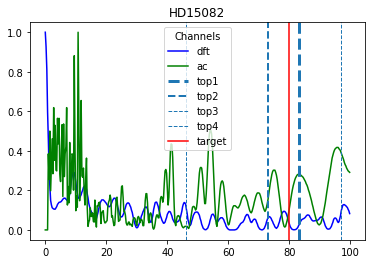

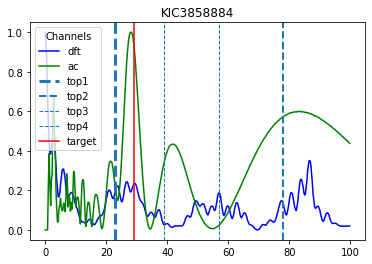

In [5]:
inf = inferences()
df_results_delta_scuti = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_delta_scuti,
    take_number=11,
    csv_L=csv_delta_scuti,
    debug=True,
)

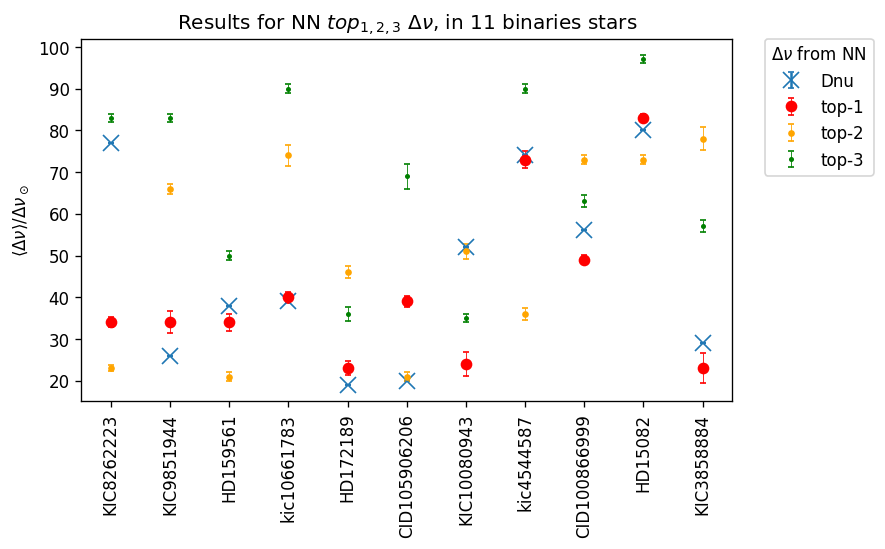

In [6]:
inf.plot_inferences(
    df_results_delta_scuti,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 11 binaries stars",
    plot_size=(7, 4),
)

In [7]:
df_results_delta_scuti

id dnu-target top1    e-top1 top2    e-top2 top3    e-top3 top4  \
0     KIC8262223         77   34  1.161095   23  0.757434   83  1.005299   47   
1     KIC9851944         26   34  2.605530   66  1.189474   83  1.003733   54   
2       HD159561         38   34  2.024747   21  1.064188   50  1.013231   73   
3    kic10661783         39   40  1.297765   74  2.518126   90  1.087349   58   
4       HD172189         19   23  1.634795   46  1.377856   36  1.718467   89   
5   CID105906206         20   39  1.229034   21  1.178451   69  2.962202   52   
6    KIC10080943         52   24  2.963901   51  1.824679   35  0.926366   70   
7     kic4544587         74   73  1.929718   36  1.490254   90  1.030482   21   
8   CID100866999         56   49  1.044763   73  1.029168   63  1.455164   93   
9        HD15082         80   83  1.011470   73  1.015208   97  0.954947   46   
10    KIC3858884         29   23  3.613644   78  2.693781   57  1.409748   39   

      e-top4  ...  rho-target  e-rho-target   rho-top1  e-rho-top1   rho-top2  \
0   1.311323  ...    0.516247      0.161815  0.0990225    0.031506  0.0449611   
1   1.387807  ...    0.057596      0.018463  0.0990225    0.031506   0.378116   
2   1.730440  ...    0.123968      0.039335  0.0990225    0.031506  0.0374136   
3   1.154284  ...    0.130646      0.041429   0.137502    0.043577   0.476425   
4   1.336333  ...   0.0305653      0.009899  0.0449611    0.014468   0.182355   
5   1.141167  ...   0.0339021      0.010961   0.130646    0.041429  0.0374136   
6   1.046125  ...      0.2336      0.073637  0.0489974    0.015746   0.224615   
7   1.116072  ...    0.476425      0.149399   0.463509    0.145372   0.111142   
8   0.980278  ...    0.271323      0.085418   0.207177    0.065380   0.463509   
9   1.144795  ...    0.557684      0.174734   0.600737    0.188156   0.463509   
10  1.314869  ...   0.0718109      0.022947  0.0449611    0.014468    0.52988   

    e-rho-top2  rho-top3  e-rho-top3   rho-top4  e-rho-top4  
0     0.014468  0.600737    0.188156   0.190451    0.060151  
1     0.118742  0.600737    0.188156   0.252105    0.079417  
2     0.012076  0.215807    0.068077   0.463509    0.145372  
3     0.149399  0.707483    0.221437   0.291253    0.091640  
4     0.057618  0.111142    0.035312   0.691694    0.216514  
5     0.012076  0.413639    0.129821     0.2336    0.073637  
6     0.070830  0.104994    0.033382   0.425838    0.133625  
7     0.035312  0.707483    0.221437  0.0374136    0.012076  
8     0.145372  0.344203    0.108163   0.755931    0.236542  
9     0.145372  0.823048    0.257471   0.182355    0.057618  
10    0.166065  0.281199    0.088501   0.130646    0.041429  

[11 rows x 22 columns]

## Multiples of top1/top2 when top2 is requiered

In [8]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_delta_scuti["dnu-target"])
            - np.asarray(df_results_delta_scuti["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_delta_scuti["dnu-target"])
            - np.asarray(df_results_delta_scuti["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 0,
    df_results_delta_scuti["top1"],
    df_results_delta_scuti["top2"],
)
# Show multiples
df_results_delta_scuti.loc[select_closest_top == 1, ["id", "top1", "top2"]]

id top1 top2
5  CID105906206   39   21
6   KIC10080943   24   51

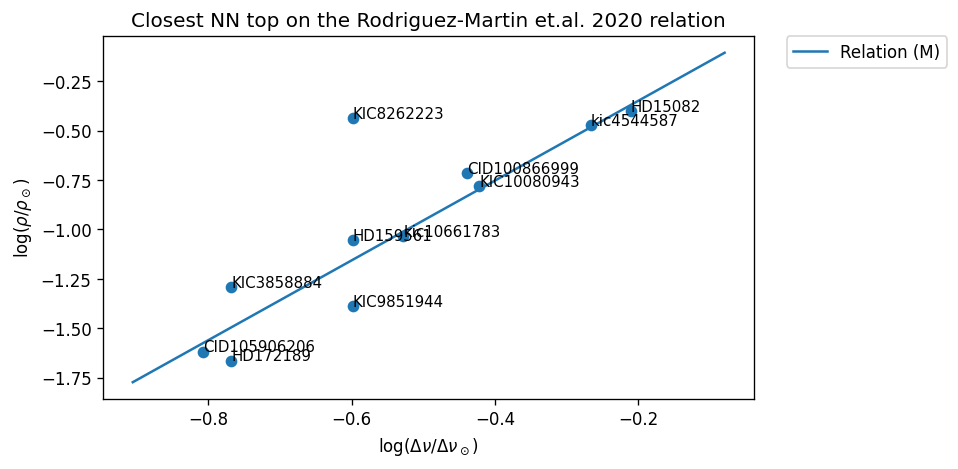

In [9]:
inferences.plot_relation_rodriguez(df_results_delta_scuti)

Input is an array. ASSUMING ORDERED FREQUENCIES AND MICRO-Hz! Plotting échelle



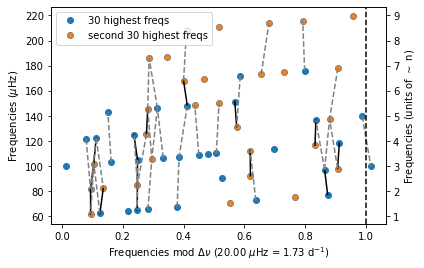

In [10]:
df_binary_freqs = pd.read_csv(
                "../../astronn/data/deltascuti/raw/CID105906206.lis",
                #"../../astronn/data/bedding/raw/tess2018234235059-s0002-0000000229139161-0121-s_lc_det.dat",
                sep="\s+",
                header=None,
                index_col=False,
                names=["f", "signif", "a", "V4", "V5", "V6", "V7"],
            )

# tess2018234235059-s0002-0000000229139161-0121-...	78	40	1.419688	71
res = echelle(df_binary_freqs[["f"]].values / 0.0864, 20, saveplot = "N")

## Results for 57 Bedding stars


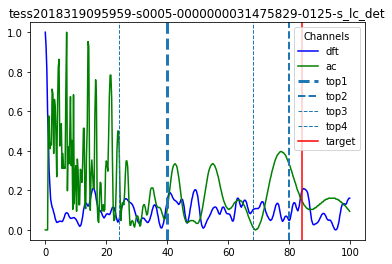

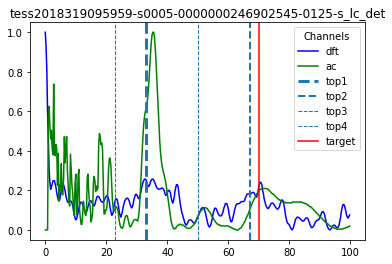

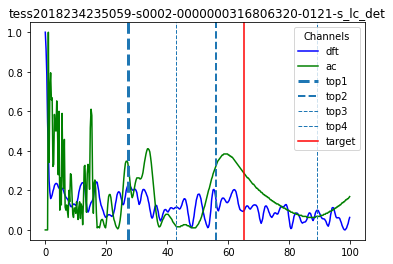

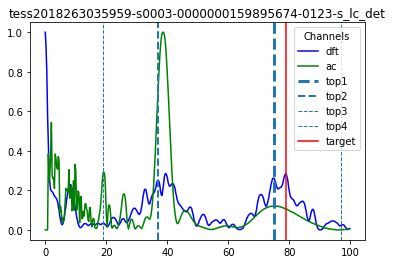

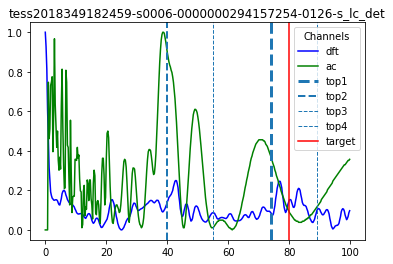

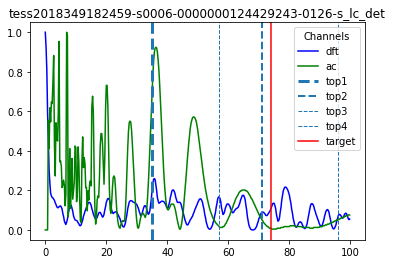

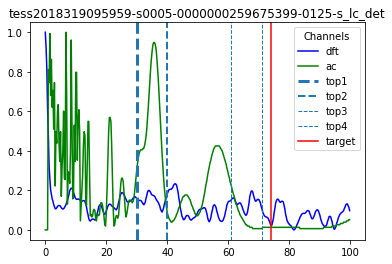

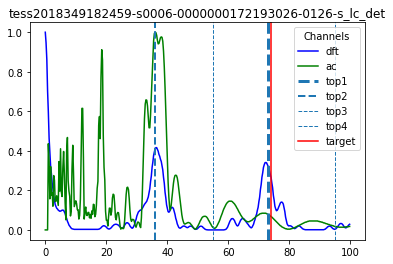

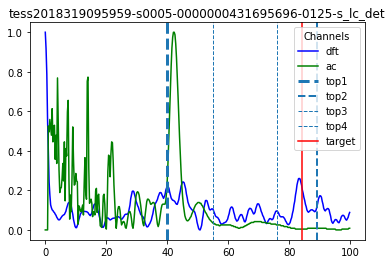

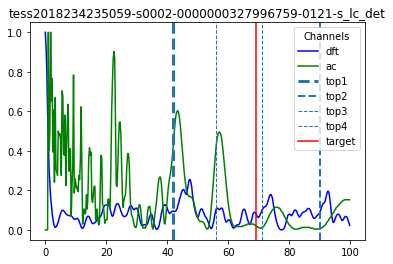

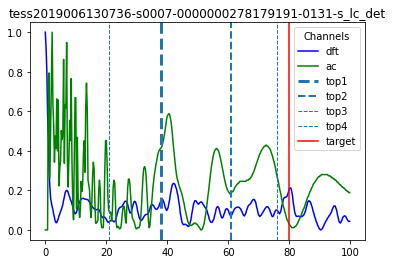

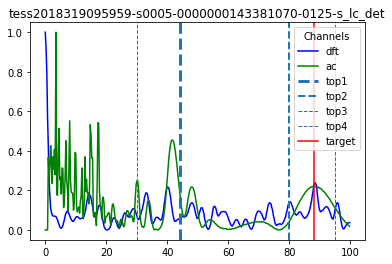

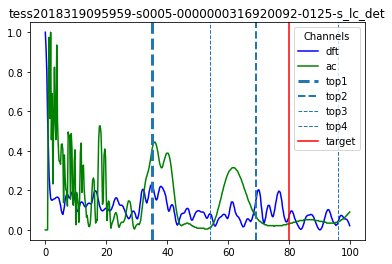

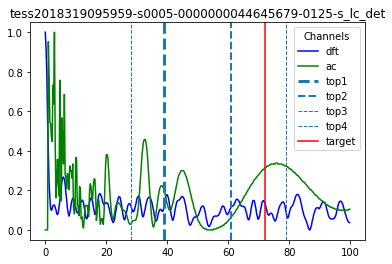

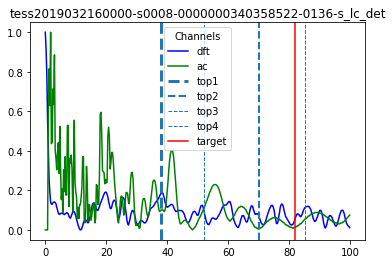

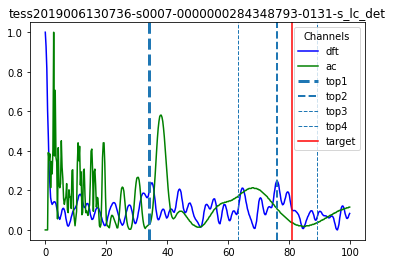

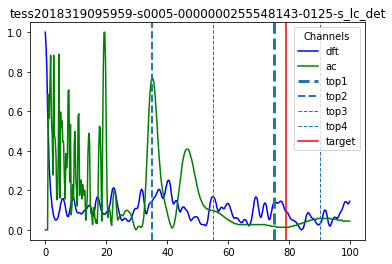

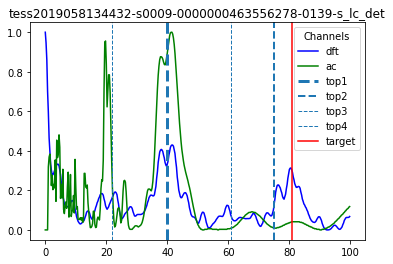

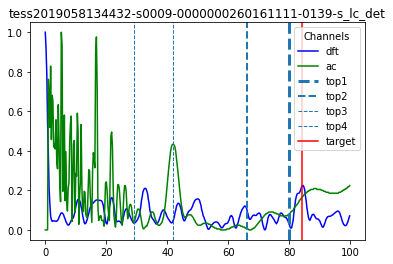

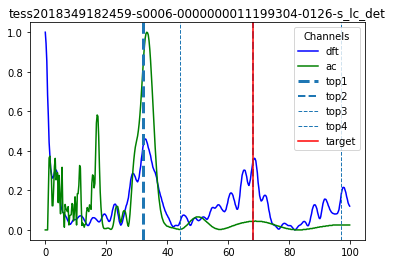

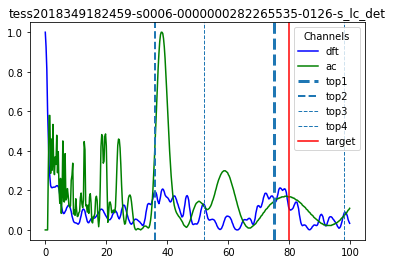

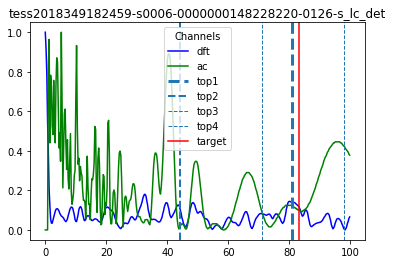

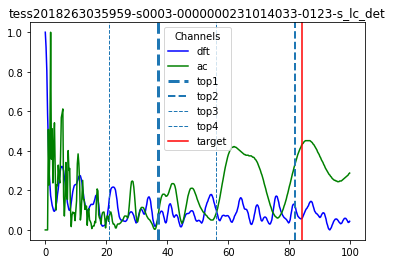

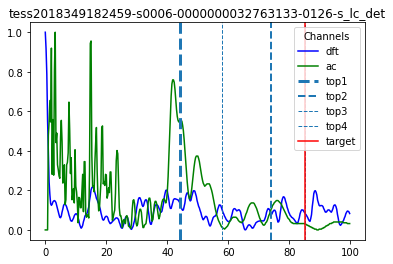

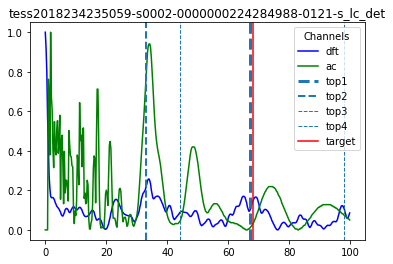

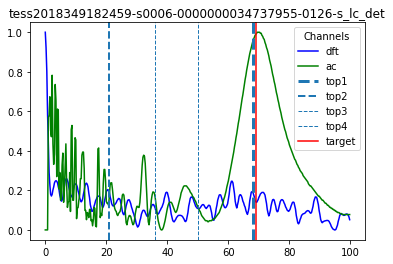

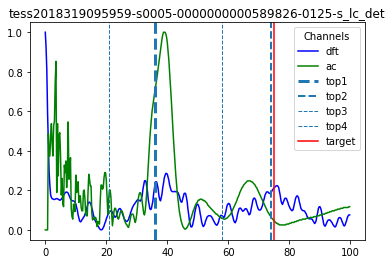

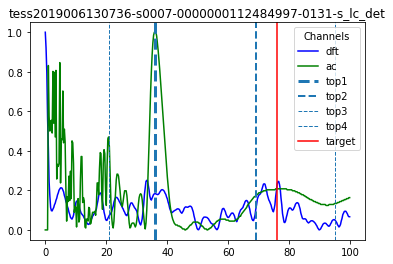

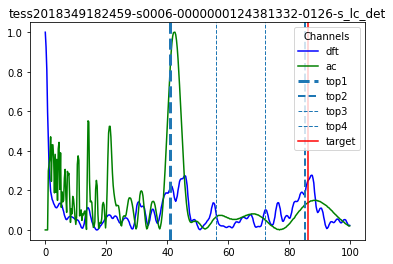

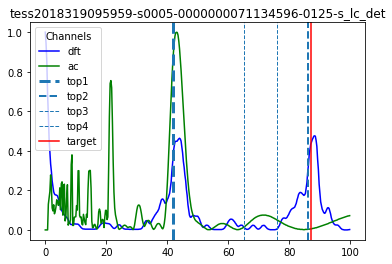

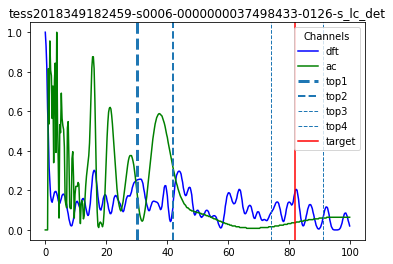

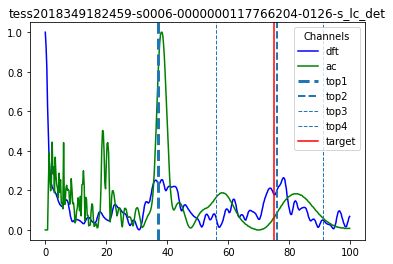

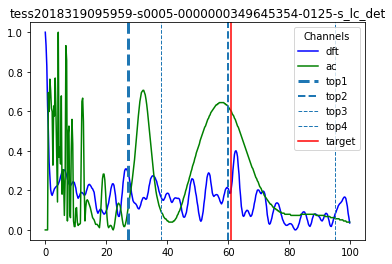

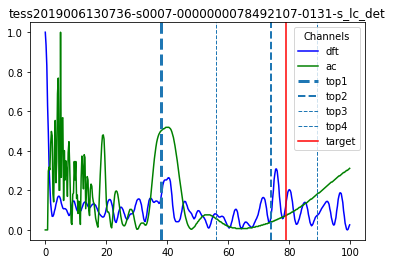

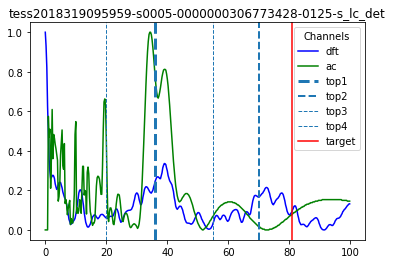

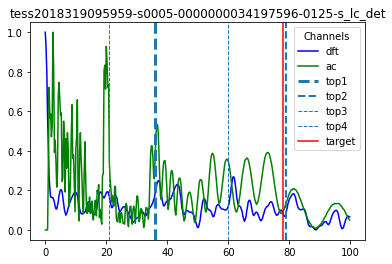

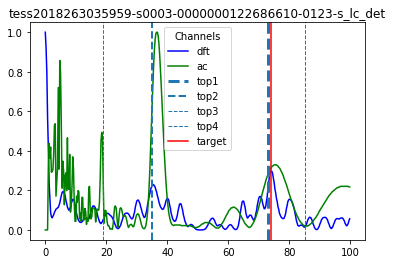

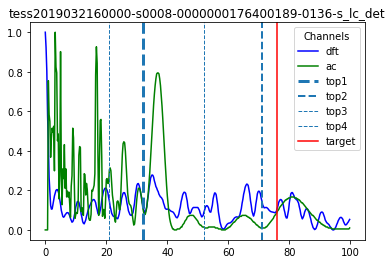

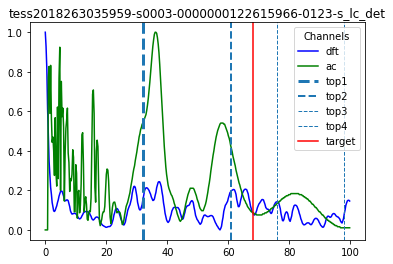

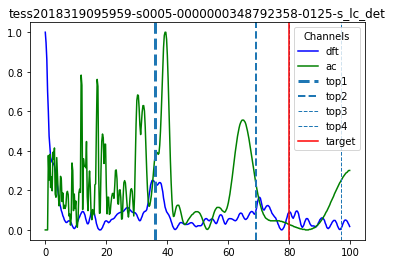

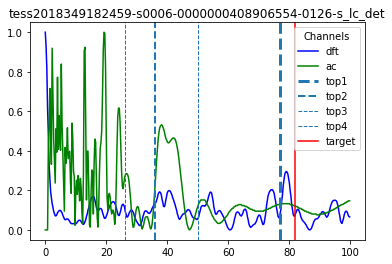

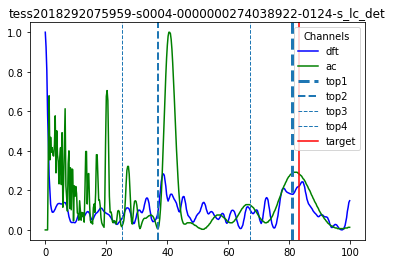

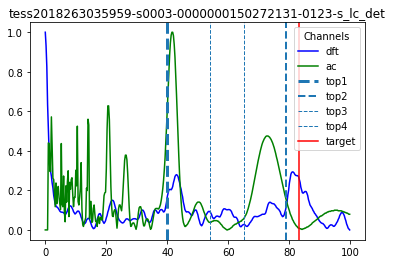

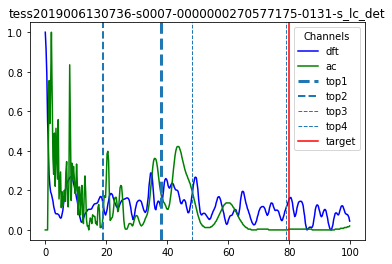

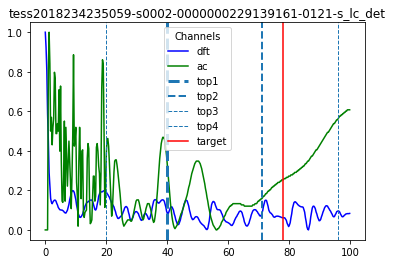

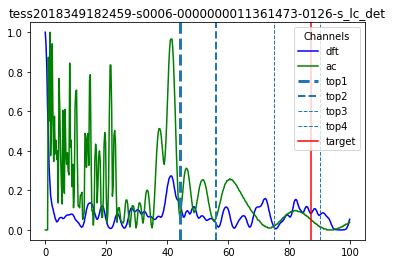

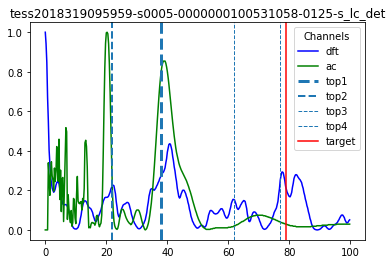

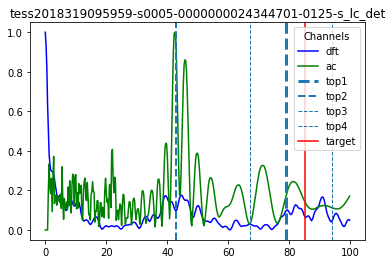

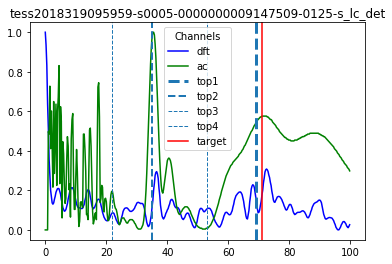

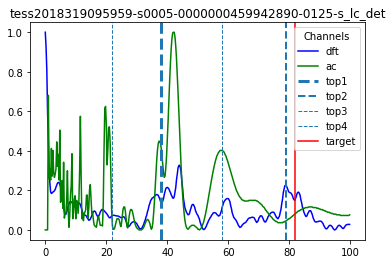

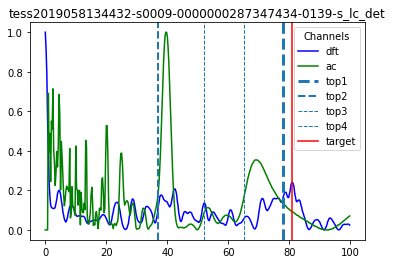

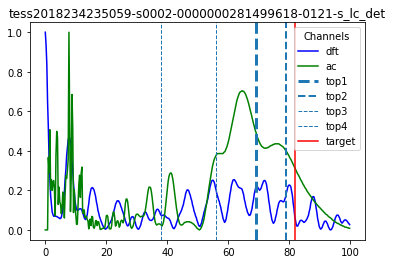

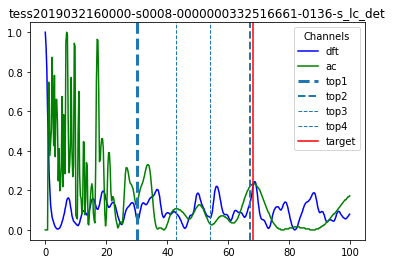

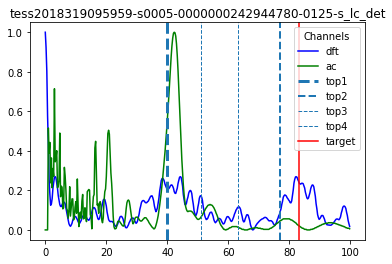

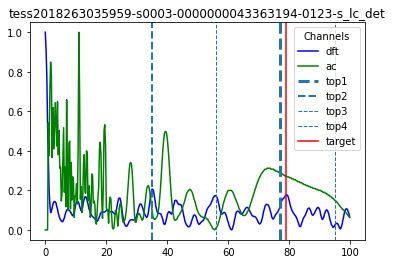

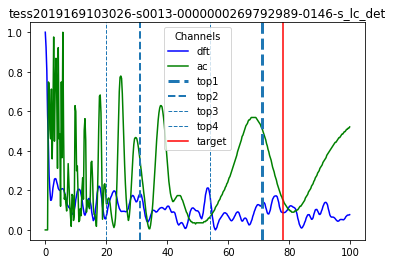

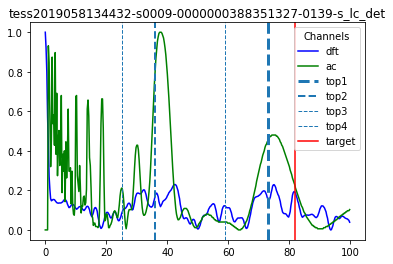

id dnu-target top1  \
0   tess2018319095959-s0005-0000000031475829-0125-...         84   40   
1   tess2018319095959-s0005-0000000246902545-0125-...         70   33   
2   tess2018234235059-s0002-0000000316806320-0121-...         65   27   
3   tess2018263035959-s0003-0000000159895674-0123-...         79   75   
4   tess2018349182459-s0006-0000000294157254-0126-...         80   74   
5   tess2018349182459-s0006-0000000124429243-0126-...         74   35   
6   tess2018319095959-s0005-0000000259675399-0125-...         74   30   
7   tess2018349182459-s0006-0000000172193026-0126-...         74   73   
8   tess2018319095959-s0005-0000000431695696-0125-...         84   40   
9   tess2018234235059-s0002-0000000327996759-0121-...         69   42   
10  tess2019006130736-s0007-0000000278179191-0131-...         80   38   
11  tess2018319095959-s0005-0000000143381070-0125-...         88   44   
12  tess2018319095959-s0005-0000000316920092-0125-...         80   35   
13  tess2018319095959-s0005-0000000044645679-0125-...         72   39   
14  tess2019032160000-s0008-0000000340358522-0136-...         82   38   
15  tess2019006130736-s0007-0000000284348793-0131-...         81   34   
16  tess2018319095959-s0005-0000000255548143-0125-...         79   75   
17  tess2019058134432-s0009-0000000463556278-0139-...         81   40   
18  tess2019058134432-s0009-0000000260161111-0139-...         84   80   
19  tess2018349182459-s0006-0000000011199304-0126-...         68   32   
20  tess2018349182459-s0006-0000000282265535-0126-...         80   75   
21  tess2018349182459-s0006-0000000148228220-0126-...         83   81   
22  tess2018263035959-s0003-0000000231014033-0123-...         84   37   
23  tess2018349182459-s0006-0000000032763133-0126-...         85   44   
24  tess2018234235059-s0002-0000000224284988-0121-...         68   67   
25  tess2018349182459-s0006-0000000034737955-0126-...         69   68   
26  tess2018319095959-s0005-0000000000589826-0125-...         75   36   
27  tess2019006130736-s0007-0000000112484997-0131-...         76   36   
28  tess2018349182459-s0006-0000000124381332-0126-...         86   41   
29  tess2018319095959-s0005-0000000071134596-0125-...         87   42   
30  tess2018349182459-s0006-0000000037498433-0126-...         82   30   
31  tess2018349182459-s0006-0000000117766204-0126-...         75   37   
32  tess2018319095959-s0005-0000000349645354-0125-...         61   27   
33  tess2019006130736-s0007-0000000078492107-0131-...         79   38   
34  tess2018319095959-s0005-0000000306773428-0125-...         81   36   
35  tess2018319095959-s0005-0000000034197596-0125-...         78   36   
36  tess2018263035959-s0003-0000000122686610-0123-...         74   73   
37  tess2019032160000-s0008-0000000176400189-0136-...         76   32   
38  tess2018263035959-s0003-0000000122615966-0123-...         68   32   
39  tess2018319095959-s0005-0000000348792358-0125-...         80   36   
40  tess2018349182459-s0006-0000000408906554-0126-...         82   77   
41  tess2018292075959-s0004-0000000274038922-0124-...         83   81   
42  tess2018263035959-s0003-0000000150272131-0123-...         83   40   
43  tess2019006130736-s0007-0000000270577175-0131-...         80   38   
44  tess2018234235059-s0002-0000000229139161-0121-...         78   40   
45  tess2018349182459-s0006-0000000011361473-0126-...         87   44   
46  tess2018319095959-s0005-0000000100531058-0125-...         79   38   
47  tess2018319095959-s0005-0000000024344701-0125-...         85   79   
48  tess2018319095959-s0005-0000000009147509-0125-...         71   69   
49  tess2018319095959-s0005-0000000459942890-0125-...         82   38   
50  tess2019058134432-s0009-0000000287347434-0139-...         81   78   
51  tess2018234235059-s0002-0000000281499618-0121-...         82   69   
52  tess2019032160000-s0008-0000000332516661-0136-...         68   30   
53  tess2018319095959-s0005-0000000242944780-0125-...         83   40   
54  tess2018263035959-s0003-00000000

In [11]:
df_results_bedding = inf.get_processed_inferences(
    nn_model=sepconv_mod,
    df_stars=df_bedding,
    take_number=57,
    csv_L=csv_bedding,
    debug=True,
)
df_results_bedding

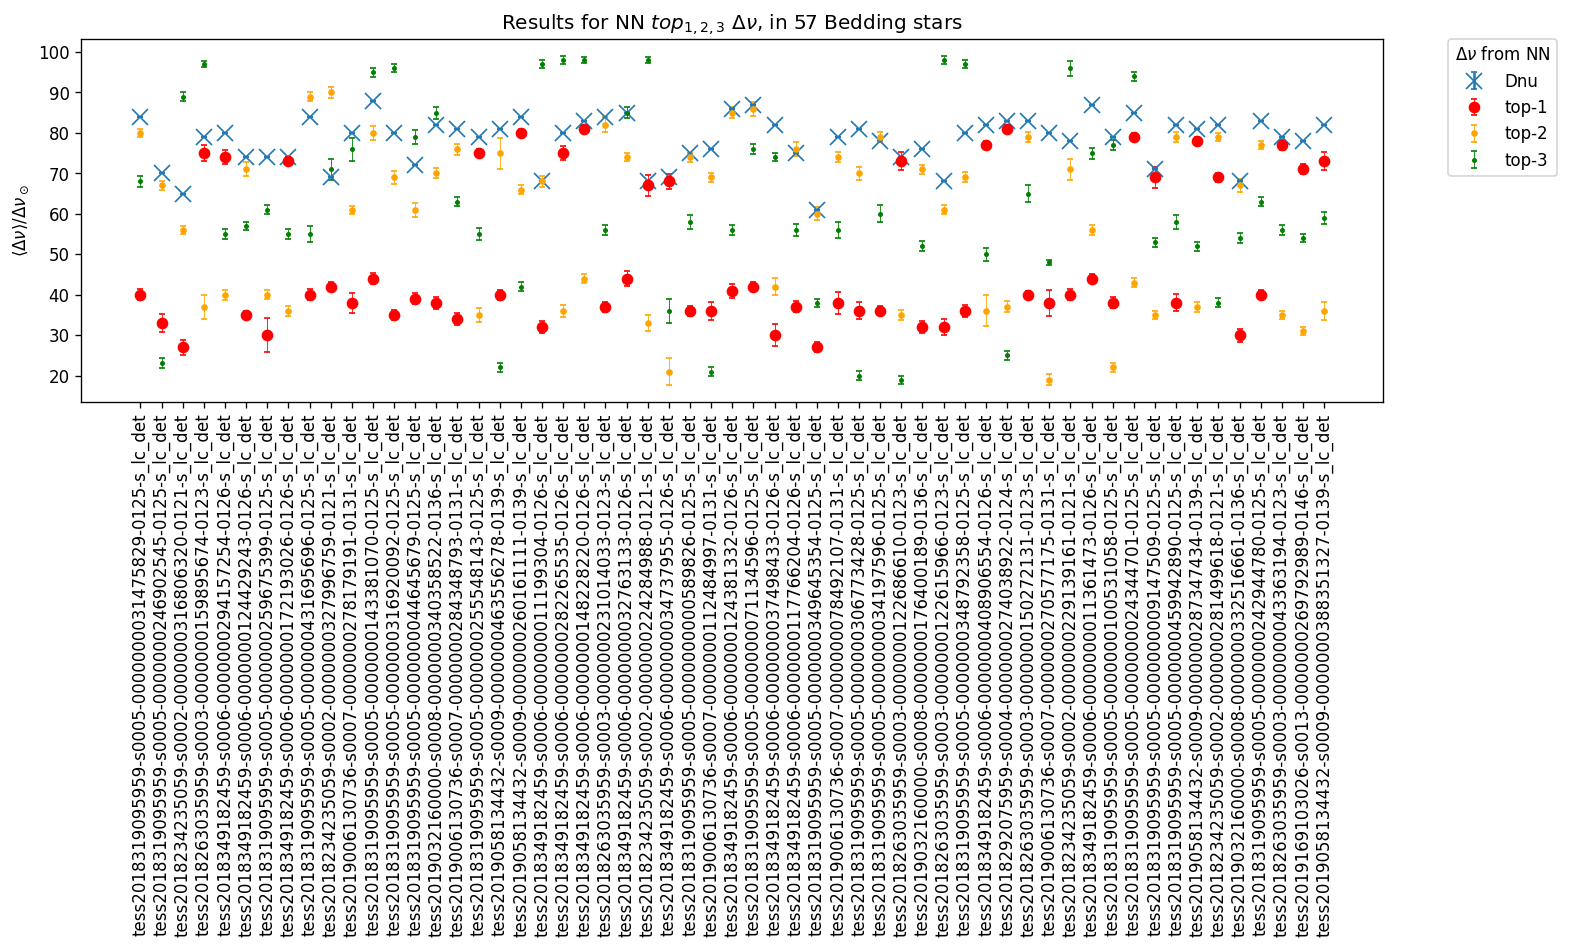

In [12]:
inf.plot_inferences(
    df_results_bedding,
    plot_title="Results for NN $top_{1,2,3}$ $\Delta\\nu$, in 57 Bedding stars",
    plot_size=(14, 4),
)

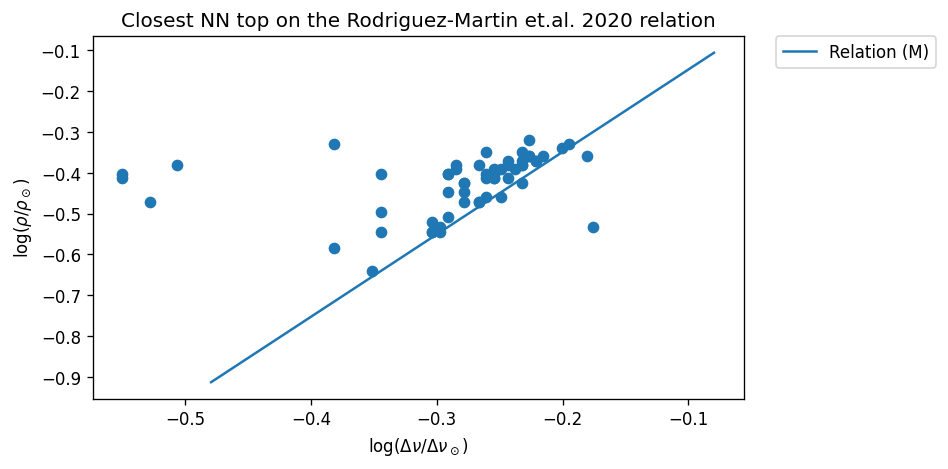

In [13]:
inferences.plot_relation_rodriguez(
    df_results_bedding, labels=False, relation_line_range=(5.2, 9)
)

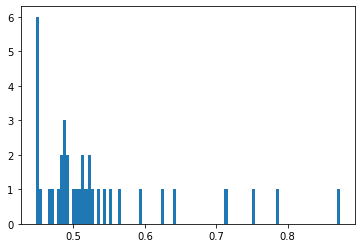

In [14]:
select_closest_top = np.argmin(
    (
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top1"]),
            2,
        ),
        np.power(
            np.asarray(df_results_bedding["dnu-target"])
            - np.asarray(df_results_bedding["top2"]),
            2,
        ),
    ),
    axis=0,
)
tops = np.where(
    select_closest_top == 1, df_results_bedding["top1"], df_results_bedding["top2"]
)

plt.hist(
    df_results_bedding.loc[select_closest_top == 1, ["top1"]].values
    / df_results_bedding.loc[select_closest_top == 1, ["top2"]].values,
    bins=100,
)
plt.show()